Problem Statement: Consider the dataset “zoo.data” and look at the info in the first five rows. The first  column denotes the animal name and the last one specifies a high-level class for the corresponding animal.  Find a solution to the following questions:
Unique number of high-level class
Perform agglomerative clustering using the 16 intermediate features
[ Hint: Refer to the agglomerative clustering (Hierarchical Clustering) module in Scikit learn and  set the number of clusters appropriately ]
Refer the below link for further documentation:
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
Compute the mean squared error by comparing the actual class and predicted high-level class.

Objective: Perform agglomerative clustering with appropriate MSE value.


In [2]:
import pandas as pd
data = pd.read_csv("zoo.csv")

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [25]:
#Display Values in Category
from tabulate import tabulate
print(tabulate(data.groupby(['class_type']).size().to_frame(), headers=['class_type','animal_name'], tablefmt="grid"))

+--------------+---------------+
|   class_type |   animal_name |
+==============+===============+
|            1 |            41 |
+--------------+---------------+
|            2 |            20 |
+--------------+---------------+
|            3 |             5 |
+--------------+---------------+
|            4 |            13 |
+--------------+---------------+
|            5 |             4 |
+--------------+---------------+
|            6 |             8 |
+--------------+---------------+
|            7 |            10 |
+--------------+---------------+


In [ ]:
import numpy as np
labels = data['class_type']
print(np.unique(labels.values))

from matplotlib import pyplot as plot
%matplotlib inline
fig, ax = plot.subplots()
(labels.value_counts()).plot(ax=ax, kind='bar')

In [3]:
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [8]:
features=data.drop('animal_name',axis=1)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   hair        101 non-null    int64
 1   feathers    101 non-null    int64
 2   eggs        101 non-null    int64
 3   milk        101 non-null    int64
 4   airborne    101 non-null    int64
 5   aquatic     101 non-null    int64
 6   predator    101 non-null    int64
 7   toothed     101 non-null    int64
 8   backbone    101 non-null    int64
 9   breathes    101 non-null    int64
 10  venomous    101 non-null    int64
 11  fins        101 non-null    int64
 12  legs        101 non-null    int64
 13  tail        101 non-null    int64
 14  domestic    101 non-null    int64
 15  catsize     101 non-null    int64
 16  class_type  101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [19]:
features=data.values[:,1:-1]
features[2]

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0], dtype=object)

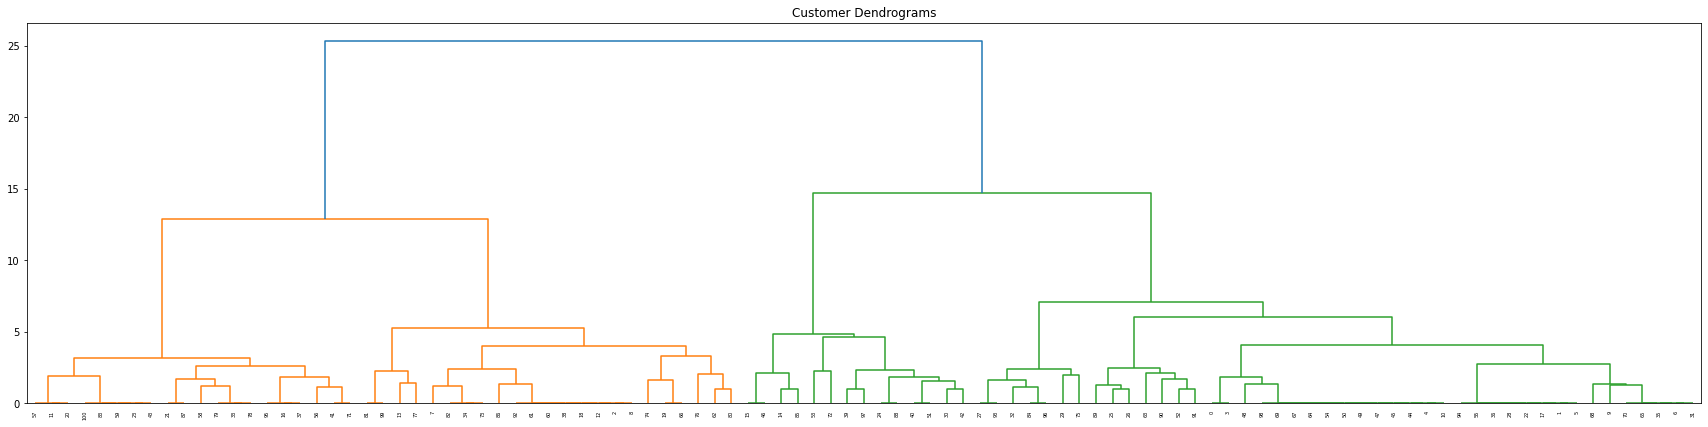

In [6]:
data_cl = data.iloc[:,1:-2].values  
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as shc  
plt.figure(figsize=(30,7))  
plt.title('Customer Dendrograms')
dend = shc.dendrogram(shc.linkage(data_cl,method='ward'))

In [6]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

model = AgglomerativeClustering(n_clusters=7,
                                    linkage="average", affinity="cosine")

In [7]:
model.fit(features)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=7)

In [8]:
model.labels_

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 6, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 5, 0, 0, 4, 3, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0])

In [9]:
print(np.unique(model.labels_))

[0 1 2 3 4 5 6]


In [10]:
labels = labels - 1

In [11]:
labels

0      0
1      0
2      3
3      0
4      0
      ..
96     0
97     5
98     0
99     6
100    1
Name: class_type, Length: 101, dtype: int64

In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
score = mean_squared_error(labels,model.labels_)

In [14]:
abs_error = np.sqrt(score)
print(abs_error)

2.4373333911071624
